# Oppgave 3: Godt og blandet om Newtons metode

Vi har tidligere sett på fikspunktitereasjon og halvereingsmetoden som algoritmer for å løse ligninger med én variabel. Nå skal vi se på en annen populær algoritme, som tilbyr betydelig raskere gonvergensegenskaper enn de andre to: Newton's metode. Newton's metode vil kunne finne nullpunktene til en funksjon $f(x)$ så lenge den er deriverbar, og bruker en som andre iterative metoder initielt estimat $x=x_0$ som utgangspunkt.


Metoden baserer seg på at hvis man starter med en verdi $x_n$, så kan man bruke funksjonsuttrykket $f(x)$ og funksjonens deriverte $f'(x)$ til å finne en ny verdi $x_{n+1}$ som vil være nærmere nullpunktet til $f(x)$:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Hvis man gjentar denne prosessen et tilstrekkelig antall ganger, så vil $x_n$ konvergere med nullpunktet, og differansen mellom $x_n$ og $x_{n+1}$ vil minke for hver iterasjon. Vanligvis avslutter man prosessen når differansen feilen $|f(x_n)|$ er mindre enn en fastsatt verdi, f.eks. $10^{-4}$. Du kan lese mer om Newton's metode [her](https://en.wikipedia.org/wiki/Newton%27s_method).

En interaktiv visualisering av newtons metode kan du se ved  å kjøre kodecellen nedenfor. Du kan prøve deg frem med ulike startverdier $x_0$ ved å klikke og dra på markøren for $x_0$:

In [3]:
%%html
 <iframe src="https://folk.ntnu.no/jonajh/jsx/newtonsmetode.html" height=600 width=800></iframe> 

Men hva gjør vi dersom vi har en ligning, og ikke en enkel funksjon å finne nullpunktene til? Da må vi ty til god gammel algebra for å omsrkive ligningen til en form $f(x) = 0$, slik at vi løser ligningen ved å finne *roten* til $f(x)$.

La oss si vi har en ligning vi ikke klarer løse analytisk: $\cos{x} = x$.
For alle ligninger vi er kjente med, kan vi flytte alle leddene over på en side av likhetstegnet slik at vi får feks:
$$
\cos{x} -x = 0
$$
Å løse ligningen betyr av vi vil finne en $x$ slik at $\cos{x} -x = 0$, problemet blir altså det samme som å
finne roten til funksjonen:
$$
f(x) = \cos{x}-x
$$

## Oppgave a)
Likningen
$\arctan(x) = \ln(x)$
har én og bare én løsning. Benytt Newtons metode med startverdi $x = 3.8$ til å finne en tilnærmet verdi for løsningen med to korrekte desimaler (det skal ikke kreve mange iterasjoner). Denne løses uten bruk av Python.


Skriv inn tallsvar til variabelen `x` nedenfor: 

In [32]:
import numpy as np
import sympy as sp

def f(x):
    return np.arctan(x) - np.log(x)

def df(x):
    return 1/(x**2 + 1) - 1/x

tol = 1e-4

x = 3.8

i = 0
while abs(f(x)) > tol:
    print(f"x_{i}:", x)
    i += 1
    x = x - f(x)/df(x)

print("--------------")
print(f"f({x}) =", f(x))
print(f"f({round(x, 4)}) =", round(f(x), 4))

x_0: 3.8
x_1: 3.6914847503098462
--------------
f(3.6925855691423317) = 2.355160844125237e-08
f(3.6926) = 0.0


## Oppgave b)
Tangenten til kurven $𝑦 = 𝑒^{2−𝑥}$ i $𝑥 = 2$ skjærer kurven $𝑦 = 𝑒^𝑥$ i et punkt der $𝑥 = 𝑎$. Oppgaven med å finne verdien til $a$ kan vi dele opp i to steg:<br><br>
* Finn funksjonen $f(x)$, som er slik at vi kan finne verdien av $a$ ved å løse denne likningen $f(x) = 0$, samt funksonens deriverte $f'(x)$. (Hint: Finn tangentlikningen først)
* Bruk Newtons metode til å bestemme en tilnærmet riktig verdi for a, korrekt avrundet til 6 desimaler. Gjør dette ved bruk av Python, du velger selv startverdi $x_0$.

*Hint 1: Dersom du sitter fast kan det lønne seg å utføre beregningene på papir først, og legge de til som programkode etterpå.* \
*Hint 2: Er du usikker på om svaret er riktig kan du plotte funksjonen $f(x)$, og finne nullpunktene grafisk.*

Skriv svaret her: 

In [35]:
import numpy as np
# Funksjonen vi skal finne nullpunktet til
def f(x):
    #-------------------------------------
    # SKRIV DIN KODE HER:
    #-------------------------------------
    return np.exp(2-x) - np.exp(x)
    
# Den deriverte av f(x)
def df(x):
    #-------------------------------------
    # SKRIV DIN KODE HER:
    #-------------------------------------
    return -np.exp(2-x) - np.exp(x)

# Implementer Newtons metode nedenfor:
#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

tol = 1e-4

x = 0

i = 0
while abs(f(x)) > tol:
    print(f"x_{i}:", x)
    i += 1
    x = x - f(x)/df(x)

a = x

print("--------------")
print(f"f({x}) =", f(x))
print(f"f({round(x, 4)}) =", round(f(x), 4))

x_0: 0
x_1: 0.7615941559557649
x_2: 0.9955835944162236
--------------
f(0.9999999712867595) = 1.5610135939425618e-07
f(1.0) = 0.0


In [36]:
print(f"Funksjonen f(x) = {f(a):.6f}  i punktet x = {a:-6f}.")

Funksjonen f(x) = 0.000000  i punktet x = 1.000000.


## Oppgave c)
Finn en tilnærmet løsning av likningen $x=g_i(x)$ for disse variantene av $g_i(x)$ ved å bruke Newtons metode med startverdi 1.5 og med **tre** iterasjoner. <br><br>

$g_1(x) = \sqrt{-e^x+x^2+4}$

$g_2(x) = \ln(4+x-x^2)$

$g_3(x) = e^x+x^2+4$

PS: Følgende print-setning kan brukes for å tolke hvorvidt $x$ er en løsning av ligningen $g_1(x)=x$ gitt en tallvariabel `x` og en funksjon `g1`:

```python
print(f"g_1({a:.6f}) = {g1(a):.6f}")
```

In [75]:
#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

def newtons_method(x0, f, df, max_it, tol=1e-4):
    x = x0

    i = 0
    while abs(f(x)) > tol:
        x = x - f(x)/df(x)

        i += 1
        if i >= max_it:
            print(f"f(x) did not converge after {i} iterations")
            print(f"final result:")
            print(f"f({round(x, 4)}) =", round(f(x), 4))
            return x
    
    print("--------------")
    print(f"f(x) converged after {i} iterations")
    print(f"f({round(x, 4)}) =", round(f(x), 4))
    return x

print("g1:")
x1 = newtons_method(
    x0=1.5,
    f=lambda x: x - np.sqrt(-np.exp(x) + x**2 + 4),
    df=lambda x: 1 - (-np.exp(x) + 2*x)/(2*np.sqrt(-np.exp(x) + x**2 + 4)),
    max_it=100,
)

print("\ng2:")
x2 = newtons_method(
    x0=1.5,
    f=lambda x: x - np.log(4 + x - x**2),
    df=lambda x: 1 - (1 - 2*x)/(4 + x - x**2),
    max_it=100,
)

g3 = lambda x: np.exp(x) + x**2 + 4

print("\ng3:")
x3 = newtons_method(
    x0=1.5,
    f=lambda x: x - g3(x),
    df=lambda x: 1 - (np.exp(x) + 2*x),
    max_it=1000,
)

g1:
--------------
f(x) converged after 2 iterations
f(1.3863) = 0.0

g2:
--------------
f(x) converged after 2 iterations
f(1.2887) = 0.0001

g3:
f(x) did not converge after 1000 iterations
final result:
f(-0.812) = -5.9153


Kjør cellen nedenfor for å svare på teorispørsmål.

In [58]:
from Quiz.quizcode import MultipleChoiceQuestion
MultipleChoiceQuestion().load("3c")

<IPython.core.display.Latex object>

GridspecLayout(children=(Button(description='1', layout=Layout(grid_area='widget001', height='50px', width='au…

## Oppgave d)
Lag et plott av $x-g(x)$ for tilfellet som ikke ser ut til å konvergere og forklar hvorfor vi ikke finner løsningen.

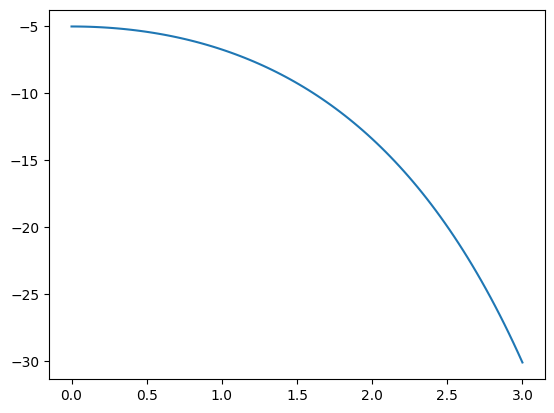

In [67]:
#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

import matplotlib.pyplot as plt

x = np.linspace(0, 3, 100)
y = x - g3(x)

plt.plot(x, y)
plt.show()

Og her skriver du forklaringen: Funksjonen har ingen nullpunkter, og dermed ingen løsning for $f(x)=0$.

In [55]:
# Kodecellen brukes under retting. La så!